# Belen Experiments Various

In [8]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary, random_clifford
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import random_unitary, Operator
from qiskit.providers.fake_provider import FakeManilaV2

from qiskit import Aer

#qk.IBMQ.save_account("aaff224a30e77d3ea3af33e2e3fb1cebfbff4e33b04ef75fdbbb9e9055426f547739b68d5b93dac4d47e7828d840a212436b1c36a358f9185574ce60af9a9f53", overwrite=True) 
provider = qk.IBMQ.load_account()
provider = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

ibmqfactory.load_account:WARNING:2023-07-28 15:52:44,824: Credentials are already in use. The existing account in the session will be replaced.


## Compiling QFT

In [9]:
from qiskit.circuit.library import QFT
qft = QFT(4, do_swaps=True, inverse=False)

U = Operator(qft).data
U_channel = ChoiMapStatic(U, mode="unitary")

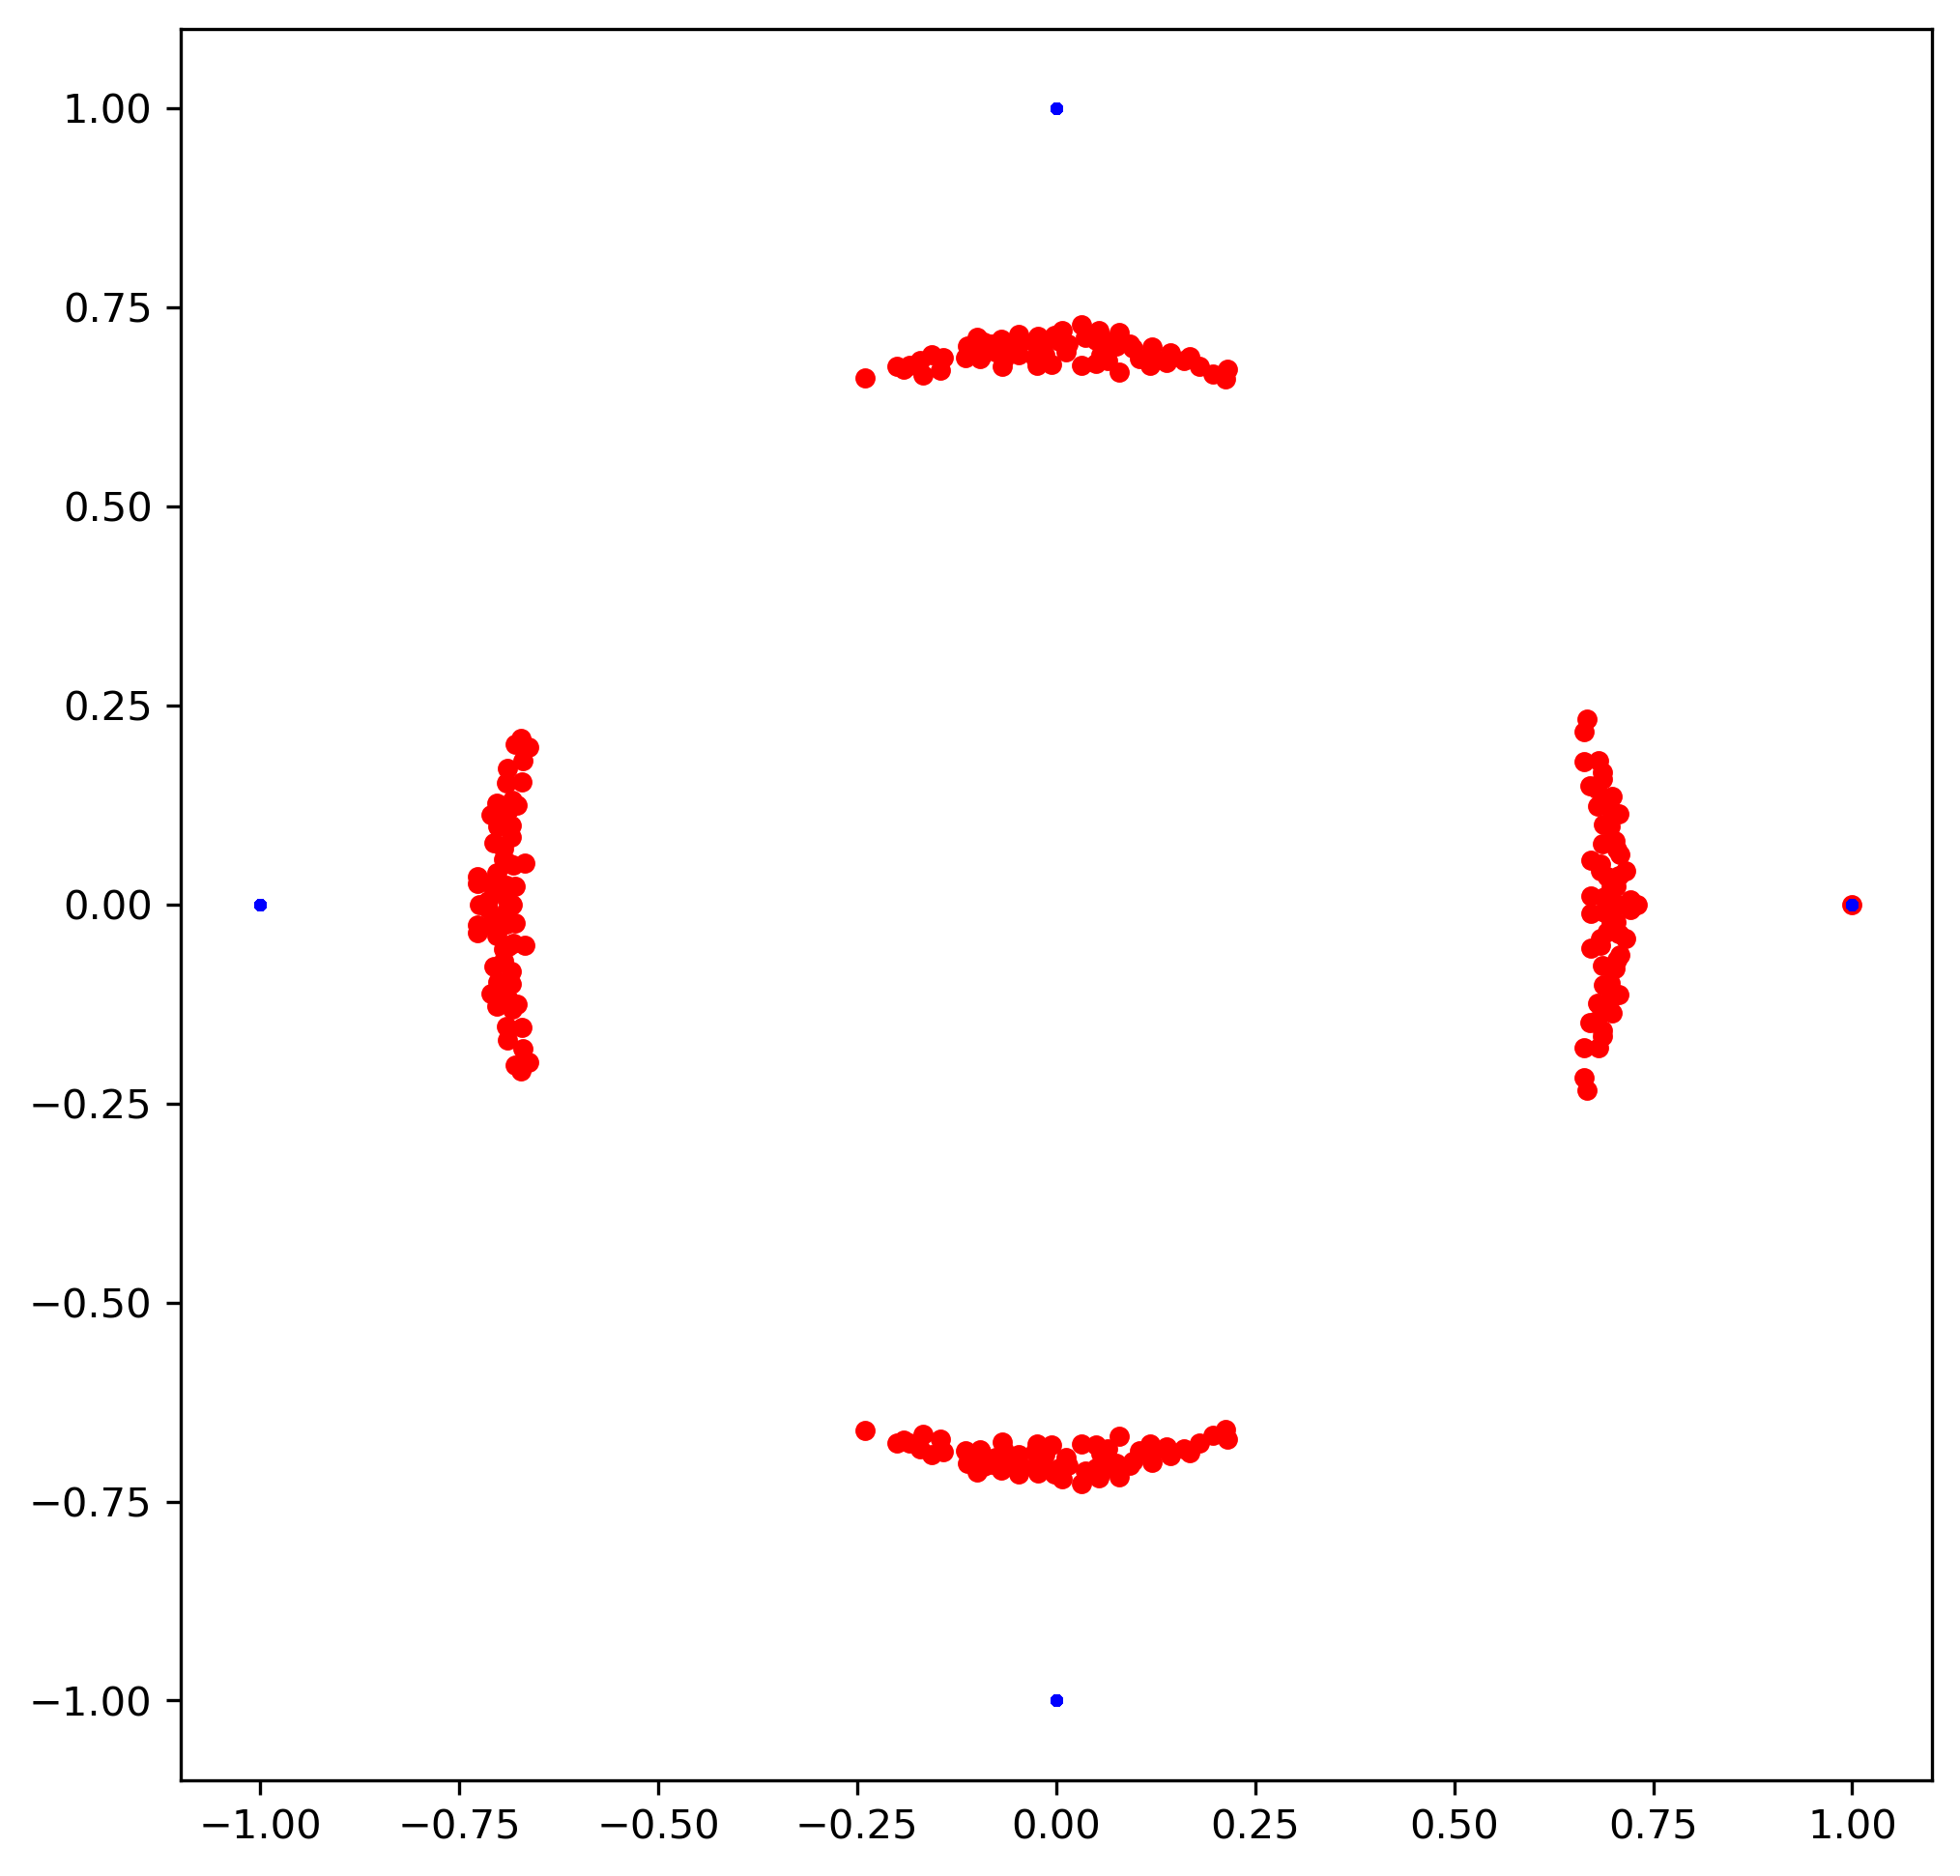

In [10]:
delta = 0.05
p = 0.3

H = random_hamiltonian(16)
U_noise = tf.linalg.expm(-1j*H*delta)
U_noise_channel = ChoiMapStatic(U_noise, mode="unitary")
channel = ConcatChannel([U_channel, U_noise_channel])
channel = DilutedChannel(channel, KrausMap(16, rank = 8), p = p)


spectrum1 = channel.spectrum()
spectrum2 = U_channel.spectrum()

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)

plt.plot(*circle, "w")
plt.plot(spectrum1[:,0], spectrum1[:,1], "ro", markersize=4)
plt.plot(spectrum2[:,0], spectrum2[:,1], "bo", markersize=2)